# Flowers


## Download the data

In [7]:
!mkdir data
!curl http://download.tensorflow.org/example_images/flower_photos.tgz | tar xz -C data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  72.7M      0  0:00:03  0:00:03 --:--:-- 57.9M


In [8]:
!ls ./data/flower_photos/

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


Flower dataset from [Tensorflow tutorials](https://www.tensorflow.org/tutorials/image_retraining). Dataset contains about 3500 images in set of subfolders. The images are not split into training and validation dataset.

## Load libraries

In [0]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import numpy as np
from matplotlib import patches, patheffects

In [0]:
from keras import backend as K
from keras.models import Model 
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.optimizers import Adam, SGD

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
  
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])
  
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
           verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

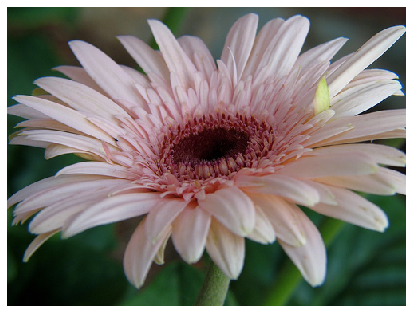

In [12]:
show_img(load_img('./data/flower_photos/daisy/1031799732_e7f4008c03.jpg'))

In [0]:
num_classes = 5
flowers = ['daisy','dandelion','roses','sunflowers','tulips']
SZ = 224
BS = 16

## Transfer learning

Try to train your flowers classifier on top of of VGG 16.

Hints: 
We have 5 different classes, so instead of binary_crossentropy and sigmoid, we are going to use categorical_crossentropy ad softmax.
The dataset is small, so data augumentation may help.  
To split the dataset into training an validation sets, use the validation_split keyword in ImageDataGenerator

In [0]:
base_model = # your code here



In [0]:
x = base_model.output
# your code here
# you can play with amount of dropout


Make sure to train only the newly added layers and compile the model:

In [0]:
# your code here

Create data generators.  

Hint:  
Use validation_split keyword in ImageDataGenerator and subset keyword in datagen.flow_from_directory().

In [18]:
train_datagen =  ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=35,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    shear_range=0.1,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory( 
    # your code here
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
  # your code here
  subset='validation'
)

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


Train your classifier and save its output to a variable.  Tou may need more epochs than 3.

In [0]:
%%time
history = model.fit_generator(
    # your code here
)

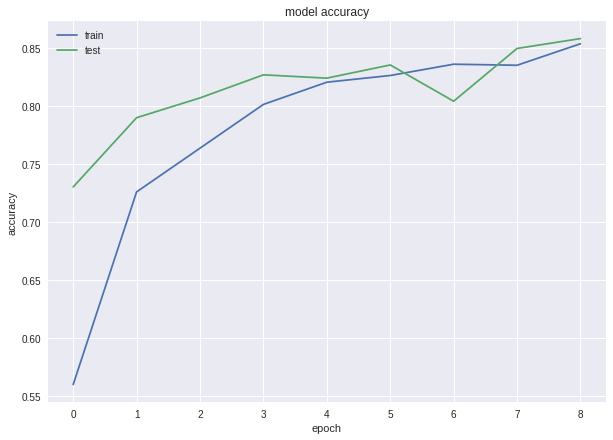

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Fine tuning

Select layers your want to train / freeze

In [0]:
# your code here

fine-tune (train) your model

## Check predictions for the validation set

In [0]:
y_true = validation_generator.classes

In [0]:
preds = model.predict_generator(validation_generator)

In [0]:
y_pred = np.argmax(preds, axis=1) # we are looking for a class with maximum score

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Plot the confusion matrix and check which classes are missclassified most often

In [0]:
# your code here

Plot some corectly and incorrectly classified images.

In [0]:
# your code here :o)